📒 [NB 2-1] 결측치 탐색 및 시각화와 전략적 대처
1. 환경 설정 및 데이터 생성
결측치 패턴을 시각적으로 확인하기 위해 missingno 패키지를 사용한다.

In [1]:
# 필수 라이브러리 설치
!pip install missingno pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# 실습용 데이터 생성 (가상의 건강검진 데이터)
# np.nan을 사용하여 인위적으로 결측치를 심는다.
data = {
    'Patient_ID': [f'P{i:03d}' for i in range(1, 16)],
    'Age': [25, 32, 45, np.nan, 55, 60, 22, 38, 45, 52, np.nan, 29, 34, 41, 66],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F'],
    'HbA1c': [5.1, 5.5, np.nan, 6.2, 7.1, np.nan, 5.0, 5.3, 8.5, np.nan, 5.2, 5.4, np.nan, 6.0, 7.5], # 당화혈색소
    'Cholesterol': [180, 200, 240, 190, np.nan, 210, 175, np.nan, 260, 230, 195, np.nan, 185, 225, np.nan],
    'Note': [np.nan] * 13 + ['Check up', 'Re-visit'] # 대부분이 비어있는 컬럼
}

df = pd.DataFrame(data)
print("데이터 생성 완료. 결측치가 포함된 데이터 미리보기:")
display(df.head())

데이터 생성 완료. 결측치가 포함된 데이터 미리보기:


,Patient_ID,Age,Gender,HbA1c,Cholesterol,Note
0,P001,25.0,M,5.1,180.0,NaN
1,P002,32.0,F,5.5,200.0,NaN
2,P003,45.0,M,NaN,240.0,NaN
3,P004,NaN,F,6.2,190.0,NaN
4,P005,55.0,M,7.1,NaN,NaN


2. 결측치 탐색 (수치 및 시각화)
눈으로 데이터를 일일이 확인하는 것은 불가능하다. 함수와 시각화 도구를 이용해 결측의 규모와 위치를 파악한다.

컬럼별 결측치 개수:
Patient_ID      0
Age             2
Gender          0
HbA1c           4
Cholesterol     4
Note           13
dtype: int64

전체 데이터 중 결측치 비율:
Patient_ID      0.000000
Age            13.333333
Gender          0.000000
HbA1c          26.666667
Cholesterol    26.666667
Note           86.666667
dtype: float64


<Figure size 800x400 with 0 Axes>

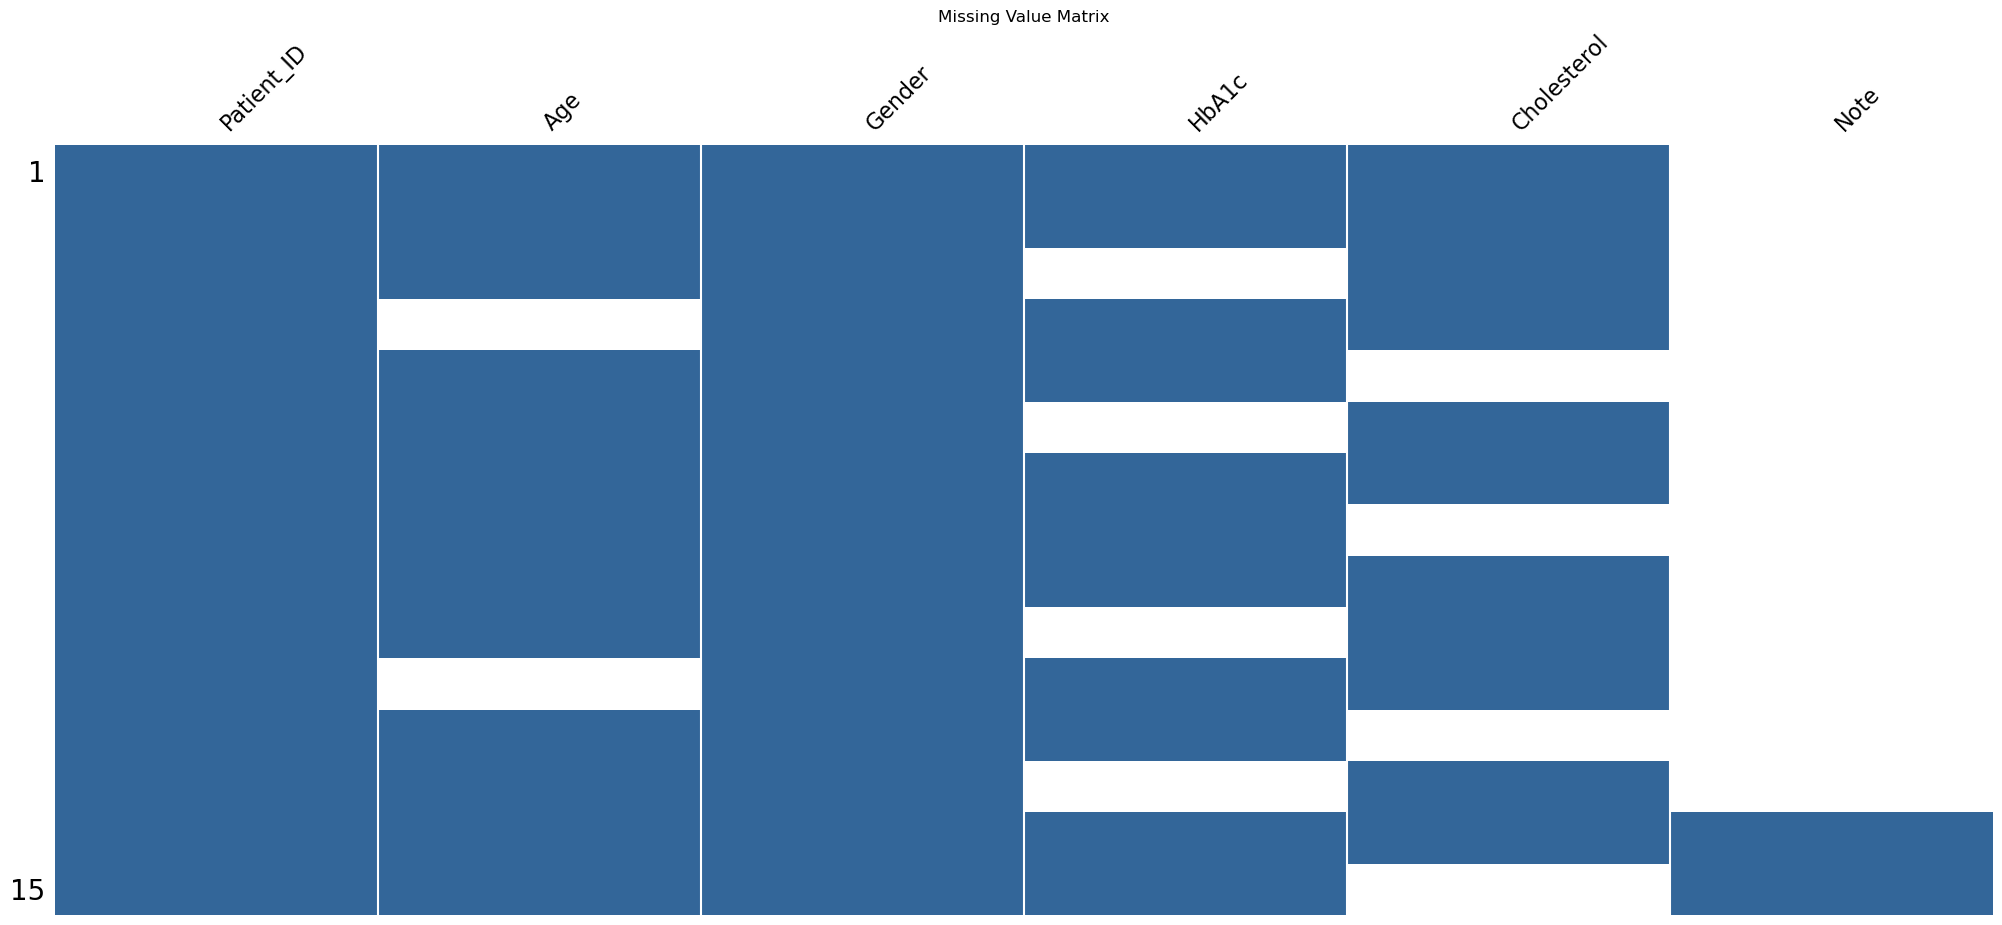

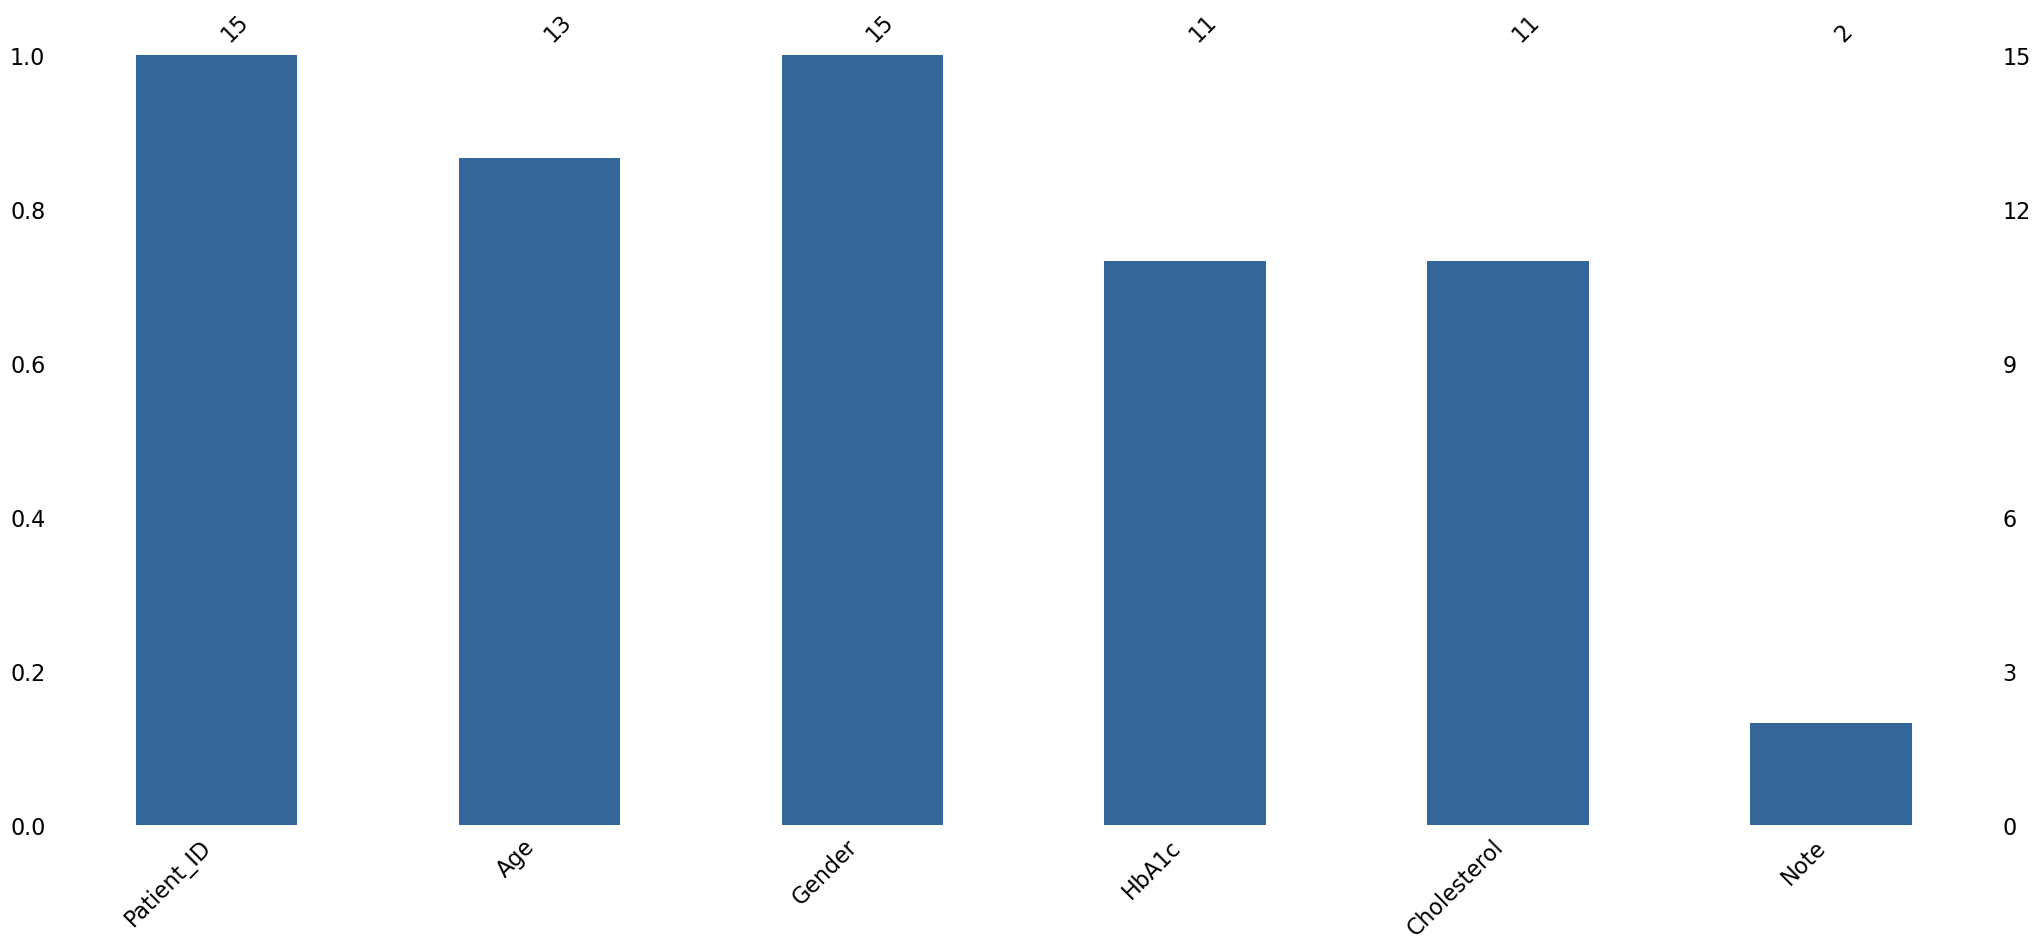

In [3]:
# 1. 수치로 확인하기
print("컬럼별 결측치 개수:")
print(df.isnull().sum())

print("\n전체 데이터 중 결측치 비율:")
print(df.isnull().mean() * 100)

# 2. 시각적으로 확인하기 (Matrix Plot)
# 흰색 선이 그어진 부분이 결측치이다.
plt.figure(figsize=(8, 4))
msno.matrix(df, sparkline=False, color=(0.2, 0.4, 0.6))
plt.title("Missing Value Matrix")
plt.show()

# 3. 결측치 바 차트
msno.bar(df, color=(0.2, 0.4, 0.6))
plt.show()

3. 전략적 대처 1: 제거 (Drop)
결측치가 너무 많은 변수나, 데이터가 충분할 때 행을 삭제하는 방법이다.

In [4]:
# 전략 1-1: 결측이 너무 많은 컬럼(Column) 삭제
# 'Note' 컬럼은 80% 이상이 비어있어 분석 가치가 낮다고 판단한다.
df_dropped_col = df.drop(columns=['Note'])
print(f"컬럼 삭제 후 크기: {df_dropped_col.shape}")

# 전략 1-2: 결측이 하나라도 있는 행(Row) 삭제
# 분석 데이터의 무결성은 높아지지만, 데이터 손실이 크다.
df_dropped_row = df_dropped_col.dropna()
print(f"행 삭제 후 남은 데이터 수: {len(df_dropped_row)}명 (원본 15명)")

컬럼 삭제 후 크기: (15, 5)
행 삭제 후 남은 데이터 수: 5명 (원본 15명)


4. 전략적 대처 2: 대체 (Imputation)
데이터 손실을 막기 위해 합리적인 값으로 채워 넣는다. 컬럼의 특성(분포)에 따라 평균값이나 중앙값을 선택한다.

In [5]:
# 원본 보호를 위해 복사본 생성
df_imputed = df.copy()

# 1. 평균(Mean) 대체: 데이터가 정규분포에 가까울 때 (예: HbA1c)
hba1c_mean = df['HbA1c'].mean()
df_imputed['HbA1c'] = df_imputed['HbA1c'].fillna(hba1c_mean)
print(f"HbA1c 결측치를 평균({hba1c_mean:.2f})으로 대체함.")

# 2. 중앙값(Median) 대체: 이상치(Outlier)가 있거나 표본이 적을 때 (예: Age)
age_median = df['Age'].median()
df_imputed['Age'] = df_imputed['Age'].fillna(age_median)
print(f"Age 결측치를 중앙값({age_median:.0f})으로 대체함.")

# 결과 확인
print("\n대체 완료 후 결측치 현황:")
print(df_imputed[['Age', 'HbA1c']].isnull().sum())

HbA1c 결측치를 평균(6.07)으로 대체함.
Age 결측치를 중앙값(41)으로 대체함.

대체 완료 후 결측치 현황:
Age      0
HbA1c    0
dtype: int64
